In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [22]:
def randfield(nx,ny,cutoff):
    
    # return a smooth, randomly varying field between zero and 1. As cutoff
    # increases, the structure of the field becomes smaller wavelength. 
    f = np.fft.fftshift(np.fft.fft2(np.random.rand(ny,nx)))
    [Nx,Ny] = np.meshgrid(range(0,nx),range(0,ny))
    f[np.sqrt((Nx-nx/2)**2+(Ny-ny/2)**2)>cutoff]=0
    f = np.real(np.fft.ifft2(np.fft.ifftshift(f)))
    f = f-np.amin(f)
    f = f/np.amax(f)
    
    return f

def ind2sub(array_shape, ind):
    rows = (ind / array_shape[1]).astype('int') 
    cols = (ind.astype('int') % array_shape[1]) # or numpy.mod(ind.astype('int'), array_shape[1])
    return (rows, cols)

def updategrid(s,p1,p2,p3,p4):
    
    [Ny,Nx] = np.shape(s)
    neighborsum = np.roll(s,1,axis=0)+np.roll(s,-1,axis=0)+np.roll(s,1,axis=1)+np.roll(s,-1,axis=1)
    for k in np.random.permutation(Ny*Nx):

        [i,j] = ind2sub((Ny,Nx),k)
        sij = s[i,j]
        
        ## if current pixel is OUT
        if sij == -1:
            # restore to decentralization with probability p4
            if np.random.rand() < p4:
                s[i,j] = 0 
                
        ## if current pixel is DECENTRAL
        elif sij == 0:
            # become central with probability n*p2, where n is the number of neighboring central nodes minus the number of neighboring out nodes
            if np.random.rand() < neighborsum[i,j]*p2:
                s[i,j] = 1 
            # become central with p1
            elif np.random.rand() < p1:
                s[i,j] = 1
                
        ## if current pixel is CENTRAL
        elif sij == 1:
            # experience an outtage with probability p3
            if np.random.rand() < p3:
                s[i,j] = -1 
    
    return s

In [25]:
## initial conditions
N = 32
state = np.zeros((N,N)) # this field is one if pixel is centralized, and minus one if it experienced an outtage

## four probabilities make up the dynamics
p_plant = 0.01; # a pun, both for plant a tree and power plant. This is the probability that a centralized node starts without the need of neighbors, i.e., becomes a power plant
p_join = 0.10; # probability that a de-central node becomes central if its neighbor is central. Compounds linearly with how many neighbors are central
p_outtage = .01; # probability that a centralized nodes undergoes an outtage
p_recover = .50; # probability that an outtage is fixed. this leaves the tile decentral

In [28]:
print(updategrid(state,p_plant,p_join,p_outtage,p_recover))
np.random.rand()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


0.3715705312075943

C:\Users\jtpug\AppData\Local\Temp\ipykernel_15188\2346323051.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jtpug\AppData\Local\Temp\ipykernel_15188\2346323051.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()  # So I have access to the figure and the axes of the plot.


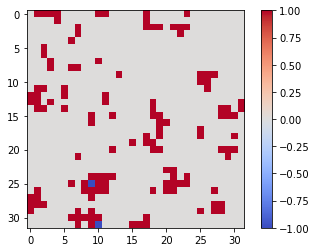

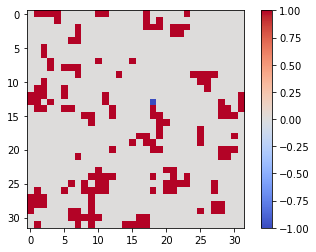

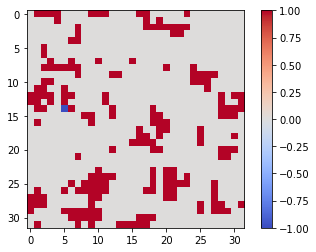

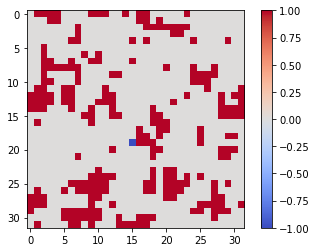

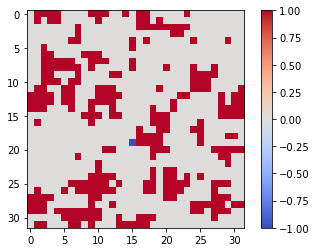

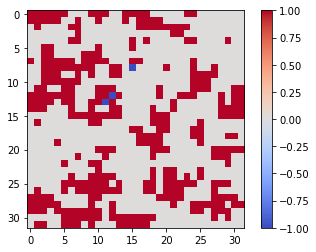

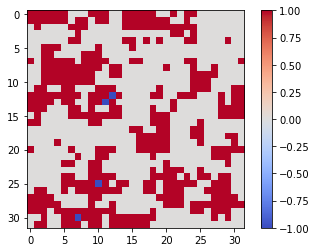

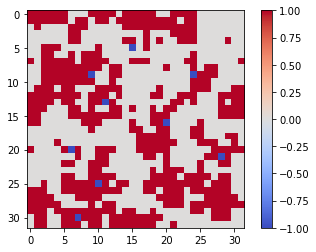

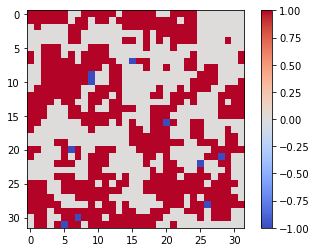

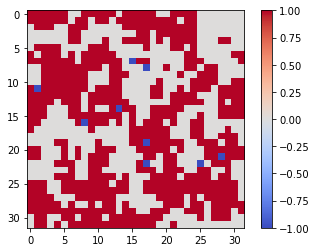

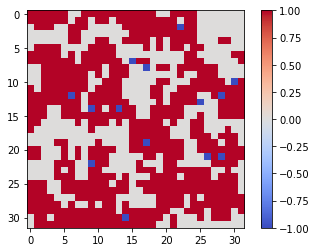

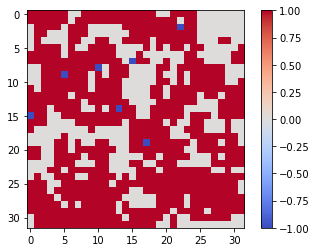

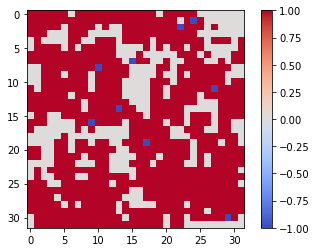

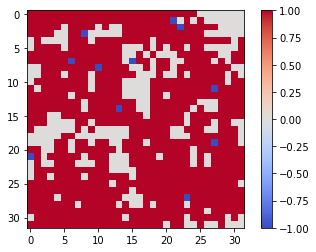

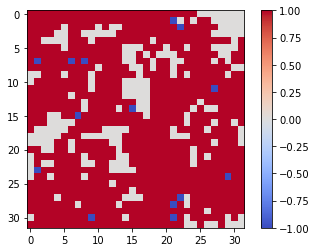

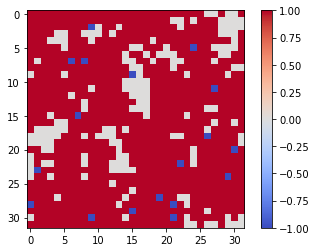

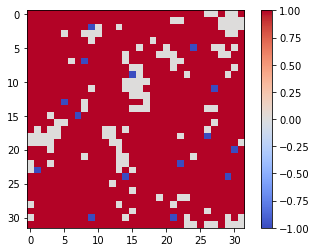

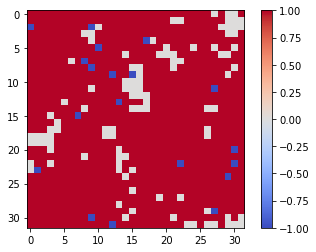

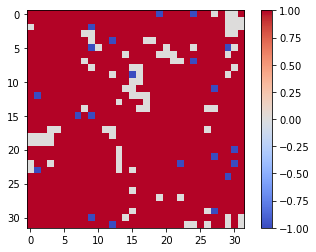

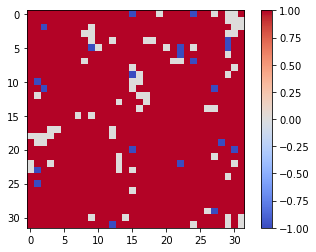

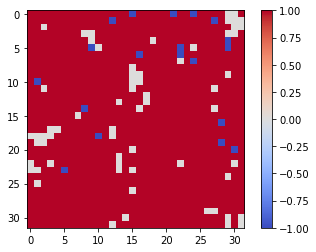

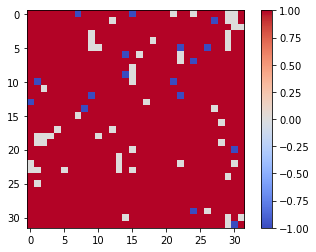

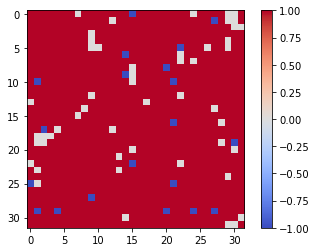

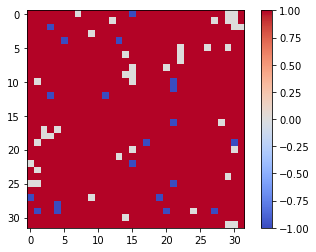

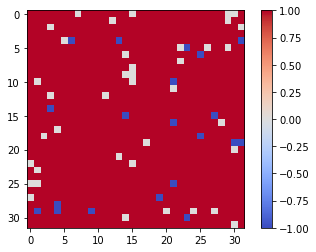

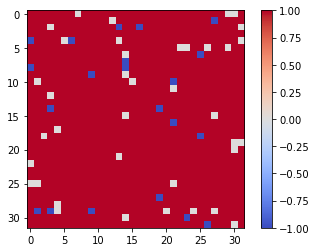

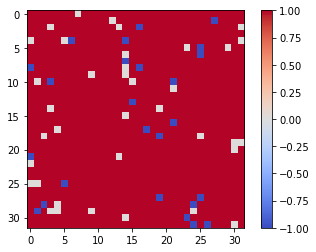

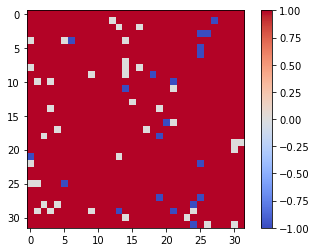

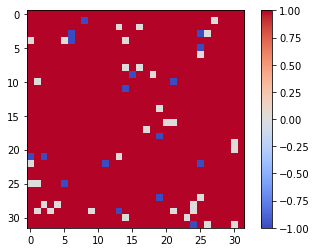

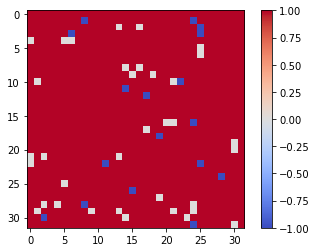

In [30]:

for i in range(30):
    state = updategrid(state,p_plant,p_join,p_outtage,p_recover)
    
    fig, ax = plt.subplots()  # So I have access to the figure and the axes of the plot.
    im = ax.imshow(state,cmap=cm.coolwarm)
    color_bar = fig.colorbar(im)
    im.autoscale()
    fig.show()
#     im.set_data(state)
#     
#     plt.pause(1)  # In interactive mode, need a small delay to get the plot to appear
#     fig.show()

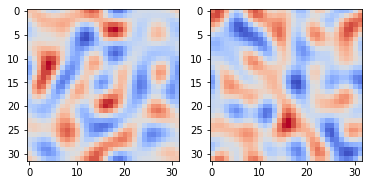

In [6]:
# plot the randomly genderated Demand and PowerGen grids
plt.subplot(121)
plt.imshow(P,cmap=cm.coolwarm)
plt.subplot(122)
plt.imshow(D,cmap=cm.coolwarm)
plt.show()

In [10]:
x = np.random.rand(2,2)
print(x)
print(x[1,1])
print(x[4])

[[0.58528304 0.59189048]
 [0.08610209 0.94060801]]
0.9406080056526268


IndexError: index 4 is out of bounds for axis 0 with size 2

In [14]:
print(np.random.permutation(5))

[3 1 0 4 2]
